# Маркетинговое исследование интернет-магазина.

Нам поручено приоритизировать ряд гипотез согласно стандартам ICE и RICE и провести анализ a/b теста проведенного в компании. Перед нами стоит цель найти наилучшую стратегию развития интернет магазина. Нами получены 3 датасета: гипотезы, заказы и посетители сайта. Необходимо провести предобработку данных, отсортировать гипотезы по приоритетности и провести статистический анализ A/B-теста.

## Загрузка данных и библиотек

### Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mth
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
pd.options.display.max_colwidth = 100

### Загрузка данных

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

<big>Мы загрузили библиотеки и получили три датасета с информацией о проверенных гипотезах, заказах и посетителях сайта.</big>

## Предобработка данных

### hypothesis

In [3]:
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.duplicated().sum() #Дубликатов нет

0

In [5]:
hypothesis.columns = hypothesis.columns.str.lower() #Привели столбцы к snake_case

In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
hypothesis.isna().sum() #Пропусков нет

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

### orders

In [8]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
orders.duplicated().sum() #Дубликатов нет, все столбцы по snake_case.

0

In [10]:
orders.columns=['orderId','userId','date','revenue','group']

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   orderId  1197 non-null   int64 
 1   userId   1197 non-null   int64 
 2   date     1197 non-null   object
 3   revenue  1197 non-null   int64 
 4   group    1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders['date'] = pd.to_datetime(orders['date']) #Привели дату к datetime

In [13]:
orders.isna().sum() #Пропусков нет

orderId    0
userId     0
date       0
revenue    0
group      0
dtype: int64

In [14]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [15]:
display(
    orders['date'].min(),
    orders['date'].max()
)


Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

### visitors

In [16]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [17]:
visitors.duplicated().sum() #тоже все в порядке

0

In [18]:
visitors['date'] = pd.to_datetime(visitors['date']) #Привели дату к datetime

In [19]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [20]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [21]:
display(
    visitors['date'].min(),
    visitors['date'].max()
)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Период посещений и заказов совпадает

### Вывод

Мы проверили данные на дубликаты и пропущенные значения, привели названия столбцов к snake_case, поменяли тип данных у даты.

### Дополнительные исследования.

In [22]:
display(
orders.query('group == "A"')['userId'].nunique(),
orders.query('group == "B"')['userId'].nunique()
)

503

586

In [23]:
orders.query('group == "A"')['userId'].isin(orders.query('group == "B"')['userId']).sum()

89

Действительно, некоторые пользователи попали в обе группы...

<AxesSubplot:xlabel='date'>

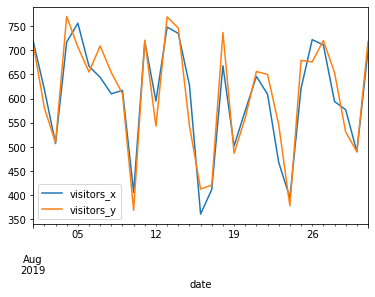

In [24]:
visitors_per_day_a = visitors.query('group == "A"').groupby('date').agg({'visitors':'sum'})
visitors_per_day_b = visitors.query('group == "B"').groupby('date').agg({'visitors':'sum'})
visitors_per_day = visitors_per_day_a.merge(visitors_per_day_b, on='date', how='outer')
visitors_per_day.plot()

Примерно одинаковое количество посетителей в обоих группах.

## Приоритезация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


<big>Фреймворк ICE включает в себя отношение влияния x уверенность к усилиям на реализацию. Фреймворк RICE учитывает так же охват пользователей x фреймворк ICE.

In [25]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'],2)
hypothesis.sort_values(by='ICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Топ-3 гипотез: 8, 0, 7

In [26]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='RICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Топ-3 гипотез: 7, 2, 0.

Изза огромного охвата(10) гипотезы 7 и гипотезы 2(8), она вырвалась вперед. В тоже время гипотеза 8 исчезла из топа, по причине низкого охвата(1).

### Вывод

<big>Мы протестировали гипотезы по фреймворкам ICE и RICE. Самые перспективные гипотезы 7, 2 и 0. Стоит сосредоточиться на их тестировании - по прогнозам, от них будет наибольшая польза.</big>

## Анализ A/B-теста

Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

### Проверка на равенство долей.

In [52]:
orders

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [27]:
alpha = .05 # критический уровень статистической значимости
successes = np.array([78, 120])
trials = np.array([830, 909])
# пропорция успехов в первой группе:
p1 = orders.query('group == "A"')['orderId'].count() / visitors.query('group == "A"')['visitors'].sum()
# пропорция успехов во второй группе:
p2 = orders.query('group == "B"')['orderId'].count() / visitors.query('group == "B"')['visitors'].sum()
# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1]) #successes - заказы пользователей, trials - все посетители сайта.
#разница пропорций в датасетах
difference = p1 - p2
#считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
#задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)
#считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
#задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.7877913878815532
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<big>Проверили равенство долей. Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.</big>

### Кумулятивные метрики

In [28]:
register_matplotlib_converters()

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [29]:
display(
    cumulativeData['date'].min(),
    cumulativeData['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Даты совпадают с исходными

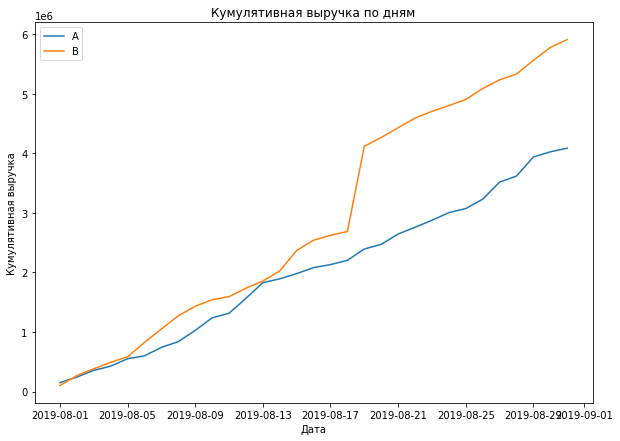

In [30]:
plt.figure(figsize=(10,7))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()#А почему выручка такая крошечная от 0 до 6?
 #Почему я не могу поменять размер графика?

Группа B лидирует над группой A, Во второй половине кумулятивная выручка группы B сильно выросла, наверное там был какой-то крупный заказ.

Text(0, 0.5, 'Кумулятивный средний чек')

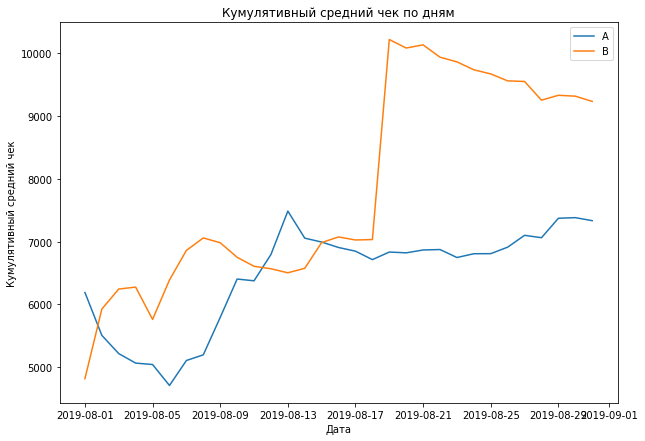

In [31]:
plt.figure(figsize=(10,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

plt.title('Кумулятивный средний чек по дням')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
 #Почему я не могу поменять размер графика? #Как мне разредить разметку по x?

Text(0, 0.5, 'Кумулятивный средний чек')

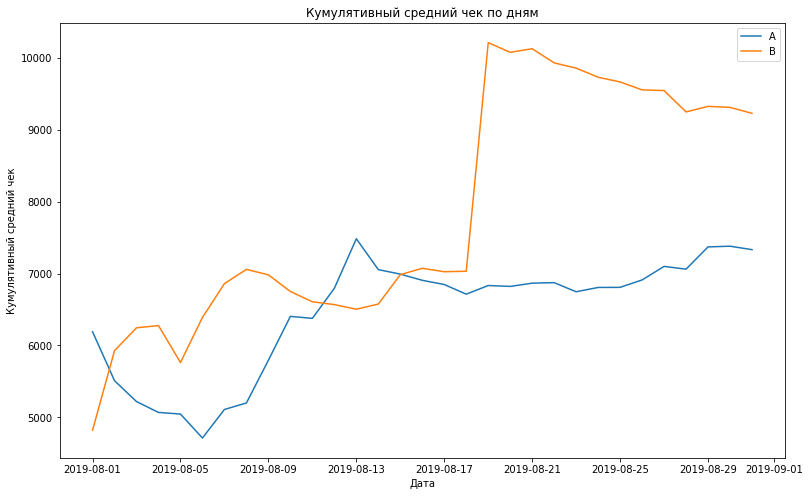

In [32]:
plt.figure(figsize=(13,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

plt.title('Кумулятивный средний чек по дням')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')


<big>Виден большой скачек в одну из дат, наверное там были аномальные заказы.</big>

<function matplotlib.pyplot.legend(*args, **kwargs)>

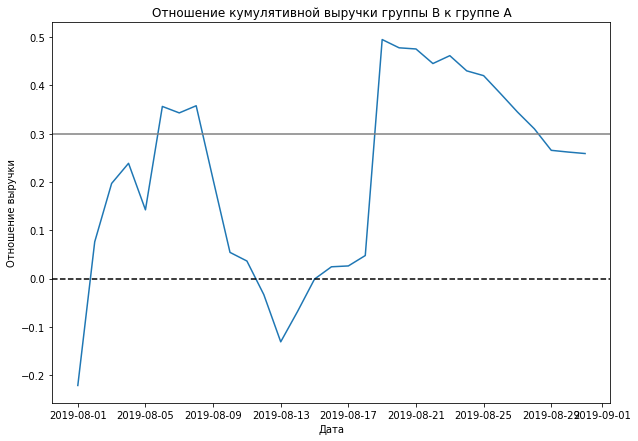

In [33]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,7))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.3, color='grey', linestyle='-')
plt.title('Отношение кумулятивной выручки группы B к группе A')
plt.ylabel('Отношение выручки')
plt.xlabel('Дата')
plt.legend

<big>Группа B резко вырвалась вперед, потом провалилась, но в последнее время сильно опережала группу A. За последнюю три месяца, график стремился к 0.</big>

(18109.0, 18139.0, 0.0, 0.05)

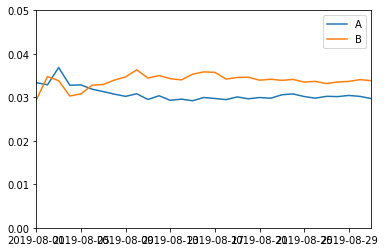

In [34]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])

<big>В начале месяца графики несколько раз менялись местами, но потом стабилизировались, и группа B доминирует над группой A по кумулятивной конверсии.</big>

(18109.0, 18139.0, -0.5, 0.5)

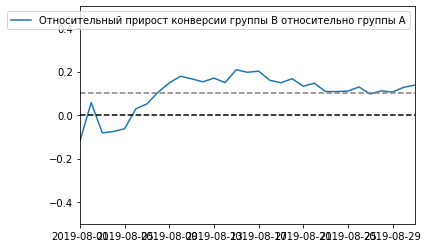

In [35]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-8-1", '2019-8-31', -0.5, 0.5]) 

<big>Группа B лидирует по конверсии от 10% до 20% по сравнению с группой A.</big>

#### Вывод

<big>Мы сравнили показатели двух групп. Согласно графикам, группа B опережает группу A по кумулятивной конверсии и выручке. Вместе с этим мы обнаружили резкий скачок в кумулятивном среднем чеке и кумулятивной средней выручке группы B. Необходимо очистить данные от выбросов и провести повторный анализ.</big>

### Выбросы

- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

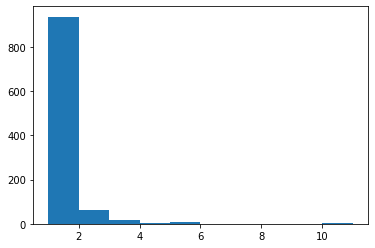

In [36]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
plt.hist(ordersByUsers['orders'])


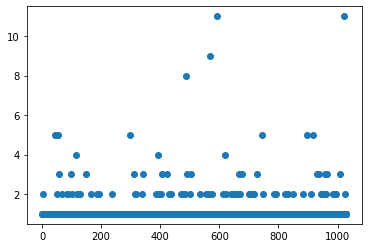

In [37]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

<big>Большинство пользователей сделали только 1 заказ за месяц</big>

In [38]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


<big>Только 5 процентов пользователей сделали больше 2х заказов в месяц, и 1% больше 4х заказов.</big>

         orderId      userId       date  revenue group
425    590470918  1920142716 2019-08-19  1294500     B
1196  3936777065  2108080724 2019-08-15   202740     B
858    192721366  1316129916 2019-08-27    93940     A
1136   666610489  1307669133 2019-08-13    92550     A
744   3668308183   888512513 2019-08-27    86620     B
682   1216533772  4266935830 2019-08-29    78990     B
662   1811671147  4266935830 2019-08-29    78990     A
743   3603576309  4133034833 2019-08-09    67990     A
1103  1348774318  1164614297 2019-08-12    66350     A
1099   316924019   148427295 2019-08-12    65710     A


(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <BarContainer object of 10 artists>)

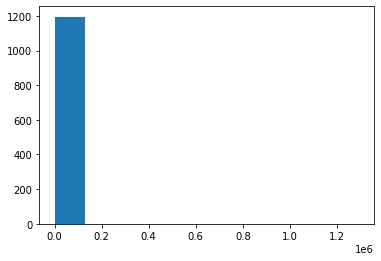

In [39]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

plt.hist(orders['revenue']) 

Text(0.5, 1.0, '')

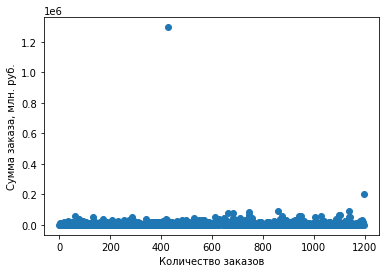

In [40]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Сумма заказа, млн. руб.')
plt.xlabel('Количество заказов')
plt.title('')

(-64672.5, 100000.0)

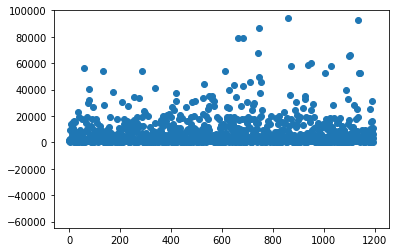

In [41]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim([-64672.5, 100000])

Стоимость большинства заказов не превышает 40000 рублей.

In [42]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


<big>95% заказов были на сумму менее 28000, 99% - менее 58233.2</big>

#### Вывод

Мы проанализировали выбросы. Ограничим выборку 2мя заказами на сумму не более 28000.

### Анализ A/B-теста

- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Гипотеза 0: Нет статистически значимой разницы между группами по «сырым» данным. Гипотеза 1: Есть статистически значимая разница между группами по «сырым» данным.

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1])) #p-value



print("Различие средних: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)) #разность конверсий

P-value: 0.017
Различие средних: 0.138


<big>p=0.017 < a = 0.05, следовательно мы отвергаем нулевую гипотезу, что конверсия между группами равна.</big>

<big>Группа B имеет на ~14% лучшую конверсию чем группа A.</big>

<big>Гипотеза 0: Нет статистически значимой разницы между группами по средним чекам. Гипотеза 1: Есть статистически значимая разница между группами по средним чекам.</big>

In [44]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])) #p-value
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) #различие средних чеков между группами

0.729
0.259


<big>p = 0.729 > a=0.005, следовательно мы не можем отвергнуть нулевую гипотезу. Средние чеки статистически одинаковые.

<big>Сгруппируем аномальных пользователей в одну таблицу.</big>

In [45]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: userId, dtype: int64


<big>Гипотеза 0: Между группами нет статистической разницы по количеству заказов после удаления аномальных поьзователей. Гипотеза 1: Между группами есть статистическая разница.</big>

In [46]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])) #p-value
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) #отношение группы B к A

0.013
0.173


<big> p = 0.013 < a=0.05, следовательно между группами есть статистическая разница в количестве заказов. В группе B заказов больше примерно на 17% чем в группе A.</big>

<big>Гипотеза 0: Между группами нет статистической разницы в среднем чеке после удаления аномальных поьзователей. Гипотеза 1: Между группами есть статистическая разница в среднем чеке.</big>

In [47]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


<big>p = 0.738 > a = 0.05, следовательно мы не можем отвергнуть нулевую гипотезу, разница в среднем чеке не статистически значима(да ее и почти нет, по выборке средний чек после удаления абнормальных пользователей +2% в пользу группы A).

#### Вывод

<big>Согласно нашим данным, группа B показала статистически значимые, лучшие результаты по конверсии пользователей(+14%) и количеству заказов(+17%).<br>Группа A не показала статистически значимого превосходства ни по одной метрике.</big>

## Общий вывод

<big>Мы протестировали гипотезы по фреймворкам ICE и RICE. Самые перспективные гипотезы 7, 2 и 0. Стоит сосредоточиться на их тестировании - по прогнозам, от них будет наибольшая польза.</big>

<big>Мы сравнили показатели двух групп. Согласно графикам, группа B опережает группу A по кумулятивной конверсии и выручке. Вместе с этим мы обнаружили резкий скачок в кумулятивном среднем чеке и кумулятивной средней выручке группы B. Необходимо очистить данные от выбросов и провести повторный анализ.

<big>Мы проанализировали выбросы. Ограничим выборку 2мя заказами на сумму не более 28000.

<big>Основываясь на полученных данных, таких как графики средней выручки и конверсии, а так же A/B тестах в группах без аномальных пользователей, мы признаем тест успешным. Методика примененная к группе B дает лучшие результаты чем методика группы A. Победила группа B.